In [23]:
import requests
import PIL.Image as Image
import io
import getpass
import matplotlib.pyplot as plt

In [20]:
api_key = 'sk-iXZRGtpEuejm11gX8VIHLo9DT2HcOyEncjSGgf1y54msjybQ'
STABILITY_KEY = getpass.getpass(api_key)

In [21]:
def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer {STABILITY_KEY}"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response

In [22]:
prompt = "Red banana" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
aspect_ratio = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3",
    "mode" : "text-to-image"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification

if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...


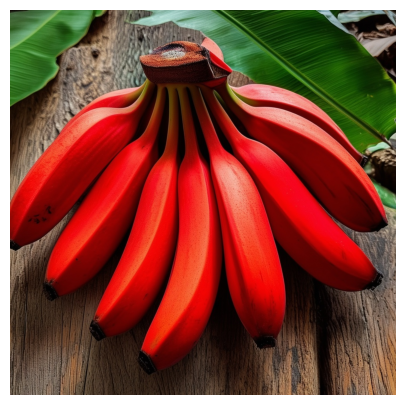

In [24]:
plt.figure(figsize=(10, 5)) 
plt.imshow(Image.open(io.BytesIO(output_image)))
plt.axis('off')
plt.show()